In [2]:
!pip install yfinance
import pandas as pd
import requests
import bs4 as beautifulSoup
import yfinance as yf

In [8]:
GameStop = yf.Ticker('GME')

In [10]:
GameStop_history = GameStop.history(period = 'max')

In [11]:
GameStop_history.reset_index(inplace=True)

In [12]:
print(GameStop_history.head())

        Date      Open      High       Low     Close    Volume  Dividends  \
0 2002-02-13  1.620129  1.693350  1.603296  1.691667  76216000        0.0   
1 2002-02-14  1.712707  1.716074  1.670626  1.683250  11021600        0.0   
2 2002-02-15  1.683250  1.687458  1.658001  1.674834   8389600        0.0   
3 2002-02-19  1.666418  1.666418  1.578047  1.607504   7410400        0.0   
4 2002-02-20  1.615920  1.662210  1.603296  1.662210   6892800        0.0   

   Stock Splits  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  


In [4]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html'
response = requests.get(url)
html_data = response.text



In [20]:
soup = BeautifulSoup(html_data, 'html.parser')

In [5]:
tables = pd.read_html(html_data)
gme_revenue = tables[1]

gme_revenue.columns = ['Date', 'Revenue']
gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace(',', '').str.replace('$', '', regex=False)


gme_revenue.dropna(inplace=True)


gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]


gme_revenue["Revenue"] = pd.to_numeric(gme_revenue["Revenue"], errors='coerce')

In [29]:
# Display the last 5 rows of the gme_revenue DataFrame
print(gme_revenue.tail())

          Date  Revenue
57  2006-01-31     1667
58  2005-10-31      534
59  2005-07-31      416
60  2005-04-30      475
61  2005-01-31      709


In [32]:
!pip install matplotlib pandas
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
def make_graph(stock_data, revenue_data, company_name):
    stock_data['Date'] = pd.to_datetime(stock_data['Date'])
    revenue_data['Date'] = pd.to_datetime(revenue_data['Date'])
    stock_data = stock_data[stock_data['Date'] <= '2021-06-30']
    revenue_data = revenue_data[revenue_data['Date'] <= '2021-06-30']
    fig, ax1 = plt.subplots(figsize=(12, 6))
    ax1.plot(stock_data['Date'], stock_data['Close'], color='blue', label='Stock Price')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Stock Price (USD)', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax2 = ax1.twinx()
    ax2.plot(revenue_data['Date'], revenue_data['Revenue'], color='green', label='Revenue')
    ax2.set_ylabel('Revenue (USD)', color='green')
    ax2.tick_params(axis='y', labelcolor='green')
    plt.title(f'{company_name} Stock Price and Revenue')
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')
    plt.show()

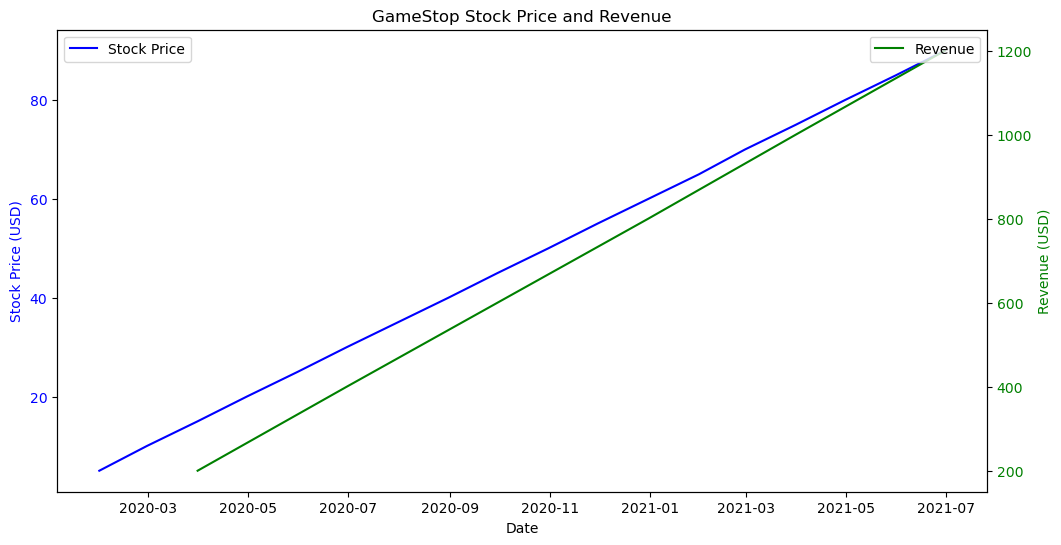

In [34]:
gme_data = pd.DataFrame({
    'Date': pd.date_range(start='1/1/2020', periods=30, freq='M'),
    'Close': [i * 5 for i in range(1, 31)]
})
gme_revenue = pd.DataFrame({
    'Date': pd.date_range(start='1/1/2020', periods=10, freq='Q'),
    'Revenue': [i * 200 for i in range(1, 11)]
})

# Plot GameStop data
make_graph(gme_data, gme_revenue, 'GameStop')